# The Sparks Foundation

# Data Science and Business Analytics Internship

# Task2: Prediction using Supervised ML
          Predict the percentage of student based on number of hours they studied.  

#### Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import warnings
warnings.filterwarnings("ignore")

#### Import Dataset

In [2]:
df = pd.read_csv("http://bit.ly/w-data")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Data Inspecting

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
df.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [8]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Exploratory Data Analysis

### Outlier analysis

<AxesSubplot:>

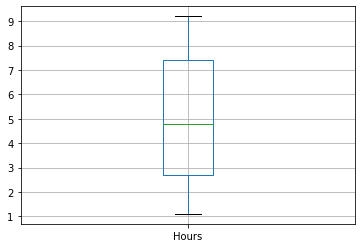

In [9]:
df.boxplot(['Hours'])

<AxesSubplot:>

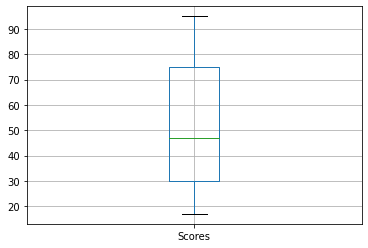

In [10]:
df.boxplot(['Scores'])

There are no outliers in the given dataset

### Correlation Matrix

<AxesSubplot:>

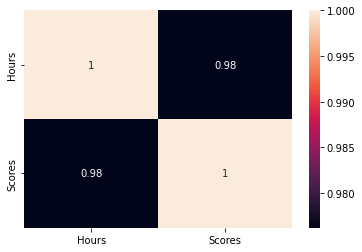

In [11]:
sns.heatmap(df.corr(),annot=True)

Hours and Scores are highly Positively correlated to each other

### Visualizing Data with Scatter Plots

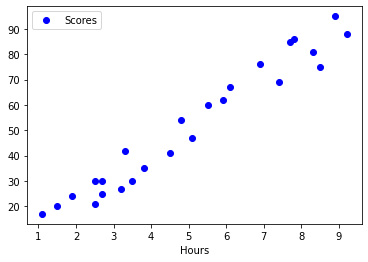

In [12]:
df.plot(x = 'Hours', y='Scores', style = 'o', color = 'blue')
plt.xlabel = 'Hours'
plt.ylabel = 'Scores'
plt.title = 'Hours VS Scores'

There is positive linear relationship between the number of hours studied and the scores obtained.

#### Preparing the training data for Linear Regression

In [13]:
x = df.drop(['Scores'], axis = 1).values

In [14]:
y = df.Scores.values

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)


In [16]:
lr=linear_model.LinearRegression()

In [17]:
lr.fit(x_train,y_train)

LinearRegression()

In [18]:
lr.coef_

array([9.91065648])

In [19]:
lr.intercept_

2.018160041434683

# Plotting the Line of regression

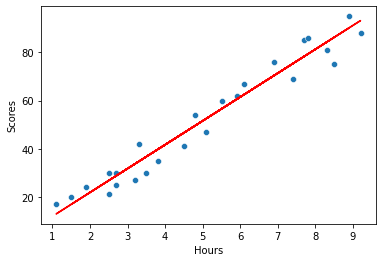

In [20]:
line = lr.coef_*x +lr.intercept_
sns.scatterplot(x='Hours',y='Scores',data=df)
plt.title = ('Regression line')
plt.plot(x, line,c='r');
plt.show()

#### Making predections

In [21]:
y_preds = lr.predict(x_test)
y_preds

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

#### Training Score 

In [22]:
print('Traning Score', lr.score(x_train,y_train))

Traning Score 0.9515510725211552


#### Testing Score

In [23]:
print('Testing Score', lr.score(x_test,y_test))

Testing Score 0.9454906892105356


#### Comparing Actual Score and Predicted Score

In [24]:
df2 = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': y_preds})
df2

,Actual Score,Predicted Score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### Model Evaluation

#### Mean absolute error

In [25]:
print('Mean absolute error : ', metrics.mean_absolute_error(y_test, y_preds))

Mean absolute error :  4.183859899002975


#### Root mean square error 

In [26]:
print('Root mean square error : ', metrics.mean_absolute_error(y_test, y_preds))

Root mean square error :  4.183859899002975


#### R2_score 

In [27]:
print('R2_score : ', metrics.r2_score(y_test,y_preds))

R2_score :  0.9454906892105356


R2 Score is 0.94 means that the model doing great linear model as less MAE and good R-Square value

# What will be predicted score if a student study for 9.25 hrs in a day?

Using the formula y = mx + c , where m = coeffiecient , c = intercept

In [28]:
y = lr.coef_ * 9.5 + lr.intercept_
y

array([96.16939661])

# Thank You !!!